<a href="https://colab.research.google.com/github/darshanrao/AR_Region_Classification/blob/main/Bfield_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Functions

In [ ]:
def normalized(img):
    normalized_input = (img - np.amin(img)) / (np.amax(img) - np.amin(img))
    return 2*normalized_input-1

In [ ]:
def normalizedp(img):
    normalized_input = (img - np.amin(img)) / (np.amax(img) - np.amin(img))
    return normalized_input

In [ ]:
def normalizedn(img):
    normalized_input = (img - np.amin(img)) / (np.amax(img) - np.amin(img))
    return normalized_input-1

In [ ]:
def plotMean(arr,title,cmap='viridis'):
  font1 = {'family':'serif','color':'Black','size':15}
  arr_mean=np.nanmean(arr,axis=(0))
  plt.imshow(arr_mean,vmax=abs(arr_mean).max(), vmin=-abs(arr_mean).max(),cmap=cmap)
  plt.colorbar()
  plt.xticks([ ])
  plt.yticks([ ])
  plt.title(title,fontdict = font1)

In [ ]:
data = np.load('drive/MyDrive/Bfield Research/Datasets/darshan_rao_bfield.npz')
lst = data.files
print(lst)
for item in lst:
    print(item)
    print(data[item].shape)
    dataset=data[item]

['arr']
arr
(512, 512, 51)


In [ ]:
dataset = np.nan_to_num(dataset)
np.isnan(dataset).any()

False

In [ ]:
new_list=[]
for i in range(51):
    for j in range(150):
        x=np.random.randint(42,512-42)
        y=np.random.randint(42,512-42)
        new_list.append(dataset[x-42:x+43, y-42:y+43,i])
new_dataset = np.array(new_list)
print(new_dataset.shape)
#Normalization 
for i in range(len(new_dataset)):
    new_dataset[i]=normalized(new_dataset[i])

(7650, 85, 85)


# Synthetics Generation

In [ ]:
shift=5
thres1,thres2,thres3=0.3,0.6,0.8
posi=[]
rn=3
for i in range(51):
  for j in range(75):
    rnx=np.random.randint(-rn,rn)
    rny=np.random.randint(-rn,rn)
    p=np.zeros((85, 85))
    x=np.random.randint(50,512-50)
    y=np.random.randint(50,512-50)
    img=dataset[x-4:x+4, y-4:y+4,i]
    mres3=np.array(list(zip(*np.where(img>thres3))))
    for ii in range(len(mres3)):
      x=np.random.randint(43-2,43+2)
      y=np.random.randint(43-2,43+2)
      p[x+rnx,y-shift+rny] = img[mres3[ii,0],mres3[ii,1]]
    mres2=np.array(list(zip(*np.where(img>thres2))))
    for ii in range(len(mres2)):
      x=np.random.randint(43-3,43+3)
      y=np.random.randint(43-3,43+3)
      p[x+rnx,y-shift+rny] = img[mres2[ii,0],mres3[ii,1]]
    mres1=np.array(list(zip(*np.where(img>thres1))))
    for ii in range(len(mres1)):
      x=np.random.randint(43-4,43+4)
      y=np.random.randint(43-4,43+4)
      p[x+rnx,y-shift+rny] = img[mres1[ii,0],mres3[ii,1]]
        
    posi.append(normalizedp(p))  

negi=[]
for i in range(51):
  x0=dataset[:,:,i].copy()
  x0=normalized(x0)
  x0=np.where(x0<0,x0,0)
  for j in range(75):
    rnx=np.random.randint(-rn,rn)
    rny=np.random.randint(-rn,rn)
    n=np.zeros((85, 85))
    x=np.random.randint(50,512-50)
    y=np.random.randint(50,512-50)
    img=dataset[x-5:x+5, y-5:y+5,i]
    mres3=np.array(list(zip(*np.where(img<-thres3))))
    for ii in range(len(mres3)):
      x=np.random.randint(43-2,43+2)
      y=np.random.randint(43-2,43+2)
      n[x+rnx,y+shift+rny] = img[mres3[ii,0],mres3[ii,1]]
    mres2=np.array(list(zip(*np.where(img<-thres2))))
    for ii in range(len(mres2)):
      x=np.random.randint(43-4,43+4)
      y=np.random.randint(43-4,43+4)
      n[x+rnx,y+shift+rny] = img[mres2[ii,0],mres3[ii,1]]
    mres1=np.array(list(zip(*np.where(img<-thres1))))
    for ii in range(len(mres1)):
      x=np.random.randint(43-6,43+5)
      y=np.random.randint(43-6,43+5)
      n[x+rnx,y+shift+rny] = img[mres1[ii,0],mres3[ii,1]]
        
    negi.append(normalizedn(n)) 

      
    


pr=[]
for i in range(int(len(new_dataset)/2)):
  pr.append(normalized((posi[i]+negi[i])))

pure_region = np.array(pr)   
pure_region.shape


pure_region.shape

pure_region = np.nan_to_num(pure_region)
np.isnan(pure_region).any()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


False

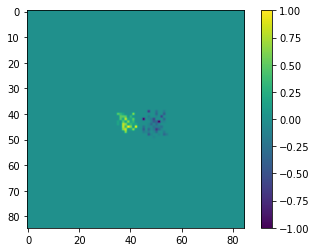

In [ ]:
plt.imshow(pure_region[4])
plt.colorbar()

([], <a list of 0 Text major ticklabel objects>)

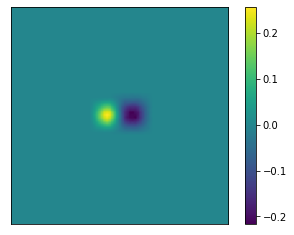

In [ ]:
pure_mean=np.nanmean(pure_region,axis=(0))
plt.imshow(pure_mean)
plt.colorbar()
plt.xticks([ ])
plt.yticks([ ])

In [ ]:
# fig, axes = plt.subplots(6,8, figsize = (64,32))
# count=0
# for i in range(6):
#     for j in  range(8):
#         axes[i,j].imshow(posi[count])
#         count+=1

In [ ]:
# pi=[5,7,10,12,19,27,35,38,41,42,44,45,49,50]
# b1=[]
# for i in range(len(posi)):
#   for x in pi:
#     if x==i:
#       b1.append(posi[i])
# len(b1)

In [ ]:
# fig, axes = plt.subplots(2,7, figsize = (64,16))
# count=0
# for i in range(2):
#     for j in  range(7):
#         axes[i,j].imshow(b1[count])
#         count+=1

In [ ]:
# from tempfile import TemporaryFile
# np.savez_compressed("synthetics3.npz",pureregion=pure_region)

In [ ]:
# fig, axes = plt.subplots(4,10, figsize = (64,32))
# count=0
# for i in range(4):
#     for j in  range(10):
#         axes[i,j].imshow(negi[count])
#         count+=1

# Synthetics Load

In [ ]:
data = np.load('drive/MyDrive/Bfield Research/Synthetics/synthetics3.npz')
lst = data.files
print(lst)
for item in lst:
    print(item)
    print(data[item].shape)
    pure_region=data[item]

['pureregion']
pureregion
(3825, 85, 85)


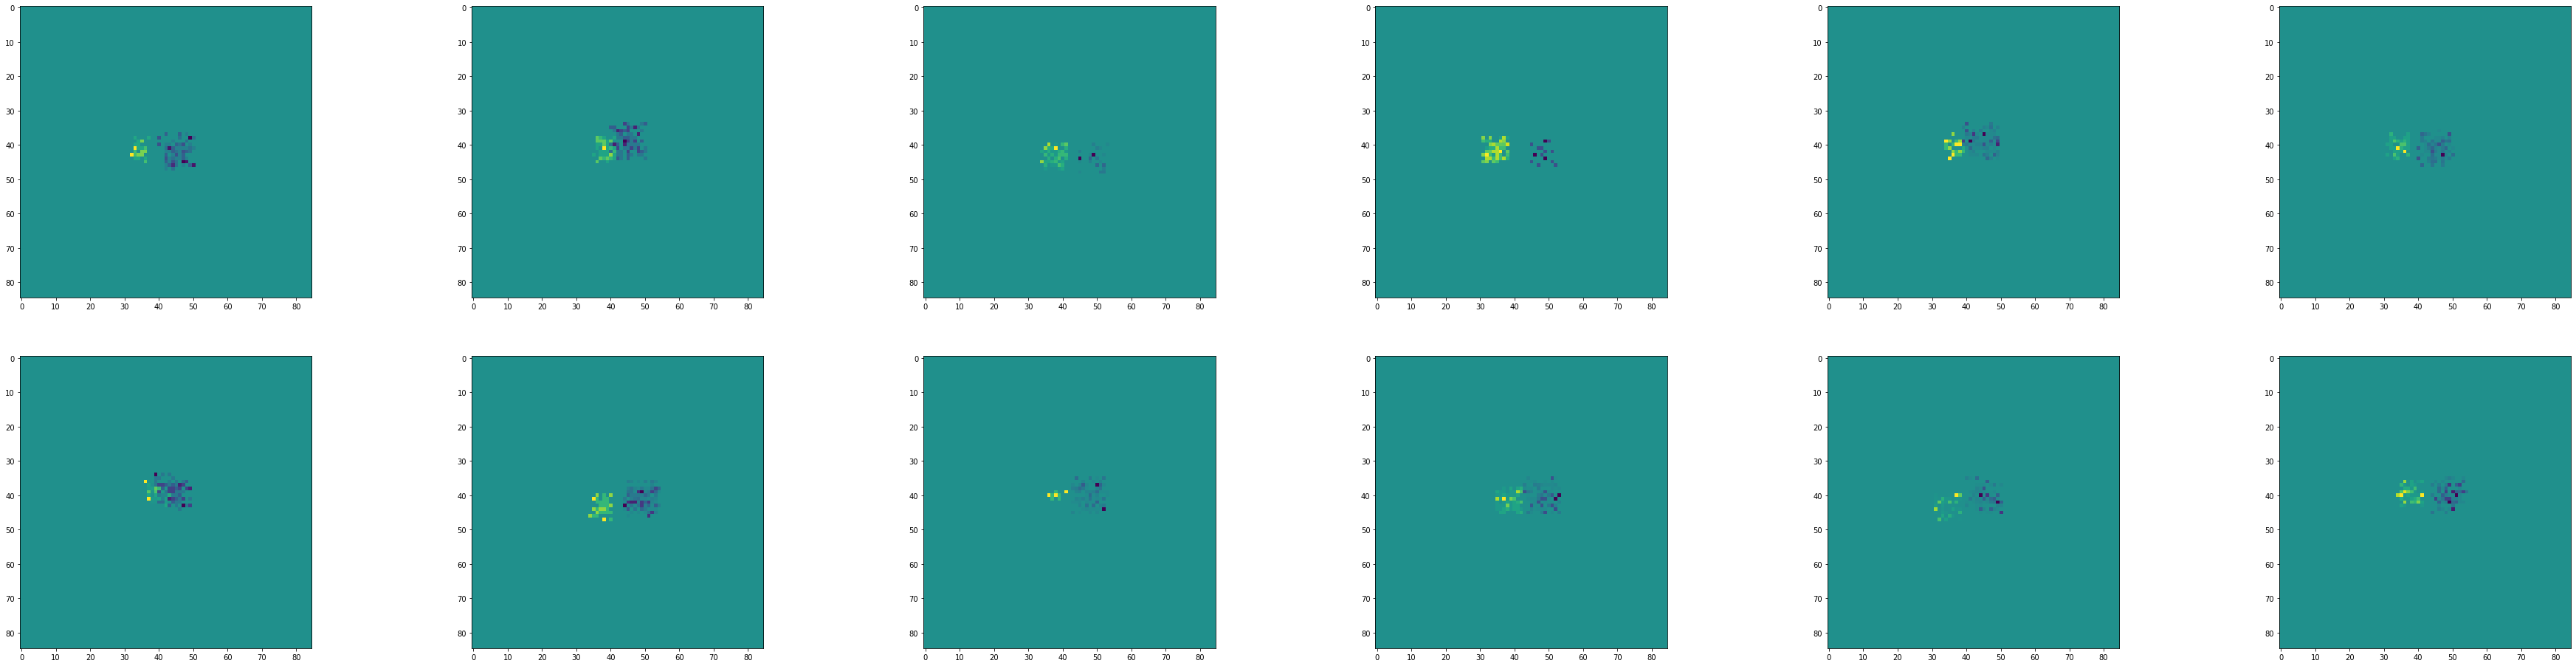

In [ ]:
fig, axes = plt.subplots(2,6, figsize = (64,16))
count=0
for i in range(2):
  for j in  range(6):
    axes[i,j].imshow(pure_region[count])
    count+=1

# SNR

In [ ]:
SNR=4

[5.76518079 2.52227938 4.25082551 ... 4.9335865  5.22517854 4.91091585]


(array([   9.,   28.,  130.,  400.,  854., 1015.,  809.,  395.,  154.,
          31.]),
 array([0.21870575, 0.90942601, 1.60014626, 2.29086652, 2.98158677,
        3.67230703, 4.36302728, 5.05374754, 5.74446779, 6.43518805,
        7.1259083 ]),
 <a list of 10 Patch objects>)

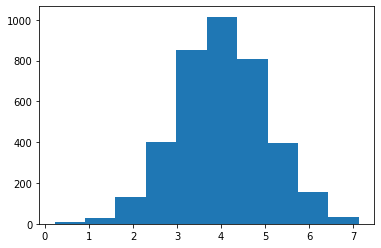

In [ ]:
mean=SNR
var=1
s = np.random.normal(mean, var, size=int(len(new_dataset)/2))
print(s)
plt.hist(s)

In [ ]:
exp1=new_dataset[:100].copy()
for i in range(len(exp1)):
    exp1[i]*=s[i]
    # print(exp1[i],s[i])
    exp1[i]+=pure_region[i]
    exp1[i]=normalized(exp1[i])

# fig, axes = plt.subplots(2,6, figsize = (64,16))
# count=0
# for i in range(2):
#     for j in  range(6):
#         ax=axes[i,j].imshow(exp1[count])
#         # fig.colorbar(ax)
#         count+=1

In [ ]:
exp1.shape

(100, 85, 85)

In [ ]:
from sklearn.model_selection import train_test_split
X1, X2 = train_test_split(new_dataset, test_size=0.5)
X1.shape,X2.shape

((3825, 85, 85), (3825, 85, 85))

In [ ]:
for i in range(len(X1)):
    X1[i]*=s[i]
    X1[i]+=pure_region[i]
    X1[i]=normalized(X1[i])

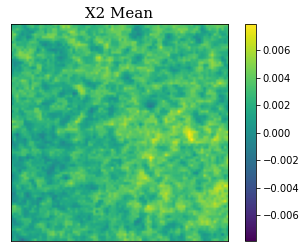

In [ ]:
plotMean(X2,'X2 Mean')

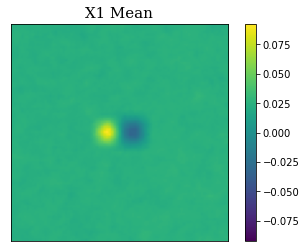

In [ ]:
plotMean(X1,'X1 Mean')

In [ ]:
final_list_X=[]
final_list_y=[]

for X in X1:
    final_list_X.append(X)
    final_list_y.append(1)
for X in X2:
    final_list_X.append(X)
    final_list_y.append(0)
X = np.array(final_list_X)
y = np.array(final_list_y)



In [ ]:
for i in range(len(X)):
    X[i]=normalized(X[i])

In [ ]:
len(X),len(y)

(7650, 7650)

In [ ]:
def plot_sample(X,y,index):
    plt.figure(figsize=(8,8))
    plt.imshow(X[index])
    plt.title(y[index])
    plt.colorbar()


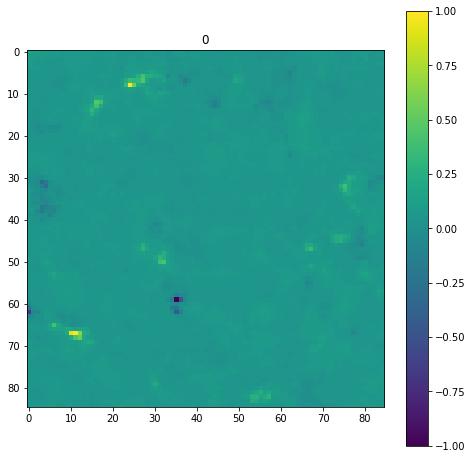

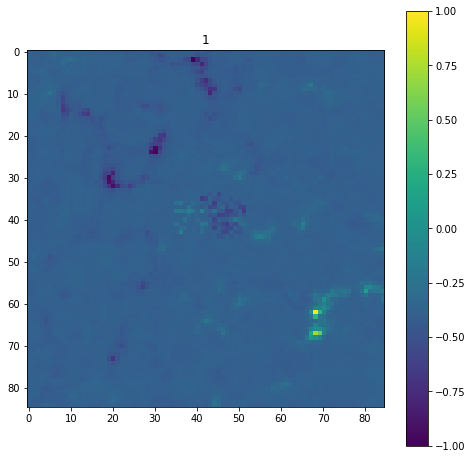

In [ ]:
plot_sample(X,y,6262)
plot_sample(X,y,54)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.1)

In [ ]:
def reshape2(data):
  nsamples, nx, ny= data.shape
  return data.reshape((nsamples,nx*ny))


In [ ]:
X_train2=reshape2(X_train)
X_test2=reshape2(X_test)
X_train2.shape,X_test2.shape

((6885, 7225), (765, 7225))

In [ ]:
act_data = np.load('drive/MyDrive/Bfield Research/Datasets/darshan_rao_bfield_AR.npz')
lst1 = act_data.files
for item in lst1:
    print(item)
    print(act_data[item].shape)
    act_dataset=act_data[item]

arr
(512, 512, 65)


In [ ]:
new_AR_list=[]
x=int(512/2)
for i in range(65):
  new_AR_list.append(act_dataset[x-42:x+43, x-42:x+43,i])
new_AR_dataset = np.array(new_AR_list)
y_AR_test=np.array([1]*len(new_AR_dataset))

# MODEL GENERATION

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# create the model - Random Forests
clf  = RandomForestClassifier(n_estimators=150)

# fit the training data to the model
clf.fit(X_train2,y_train)


y_pred = clf.predict(X_test2)

# print(classification_report(trainLabelsGlobal,clf_pred))


# MODEL LOAD

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
acc= accuracy_score(y_test, y_pred)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(acc)

[[309  55]
 [ 32 369]]
0.8862745098039215


In [ ]:
tn, fp, fn, tp=cm.ravel()
tn, fp, fn, tp

(309, 55, 32, 369)

In [ ]:
tss=(tp/(tp+fn)+tn/(tn+fp))-1
print(tss)

0.7691006001479817


In [ ]:
def createPNList(y_t,y_l,X_t):
  fn_list=[]
  fp_list=[]
  tn_list=[]
  tp_list=[]
  for i in range(len(y_t)):
    if y_t[i]==1 and y_l[i]==0:
      fn_list.append(X_t[i])
    elif y_t[i]==0 and y_l[i]==1:  
      fp_list.append(X_t[i])
    elif y_t[i]==1 and y_l[i]==1: 
      tp_list.append(X_t[i])
    elif y_t[i]==0 and y_l[i]==0: 
      tn_list.append(X_t[i])
    
  fn_np_array = np.array(fn_list).squeeze()
  if len(fn_list)==1:
    fn_np_array = np.expand_dims(fn_np_array, axis=0)
  fp_np_array = np.array(fp_list).squeeze()
  tn_np_array = np.array(tn_list).squeeze()
  tp_np_array = np.array(tp_list).squeeze()
  return tn_np_array,fp_np_array,fn_np_array,tp_np_array

In [ ]:
TN,FP,FN,TP= createPNList(y_test,y_pred,X_test)
TN.shape,FP.shape,FN.shape,TP.shape

((309, 85, 85), (55, 85, 85), (32, 85, 85), (369, 85, 85))

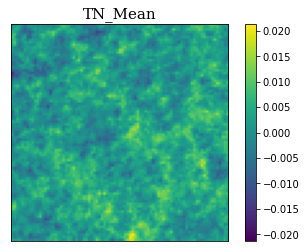

In [ ]:
plotMean(TN,'TN_Mean')

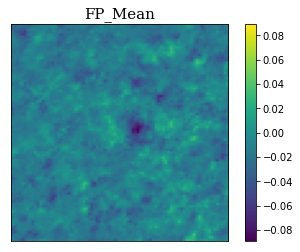

In [ ]:
plotMean(FP,'FP_Mean')

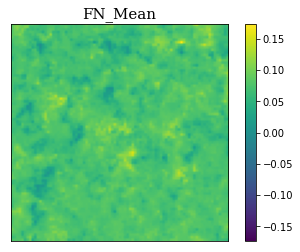

In [ ]:
plotMean(FN,'FN_Mean')

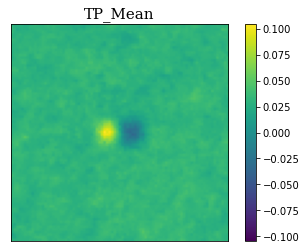

In [ ]:
plotMean(TP,'TP_Mean')

# AR DATA

In [ ]:
new_AR_dataset.shape

(65, 85, 85)

In [ ]:
for i in range(len(new_AR_dataset)):
    new_AR_dataset[i]=normalized(new_AR_dataset[i])

In [ ]:
# fig, axes = plt.subplots(8,8, figsize = (64,64))
# count=0
# for i in range(8):
#     for j in  range(8):
#         axes[i,j].imshow(new_AR_dataset[count])
#         count+=1

In [ ]:
new_AR_dataset2 = reshape2(new_AR_dataset)
y_AR_pred= clf.predict(new_AR_dataset2)
y_AR_labels= [int(np.around(element)) for element in y_AR_pred]

In [ ]:
len(y_AR_test) , len(y_AR_labels)

(65, 65)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
acc1= accuracy_score(y_AR_test, y_AR_labels)
cm1=confusion_matrix(y_AR_test, y_AR_labels)
print(cm1)
print(acc1)

[[ 0  0]
 [ 5 60]]
0.9230769230769231


In [ ]:
TN_AR,FP_AR,FN_AR,TP_AR= createPNList(y_AR_test, y_AR_labels,new_AR_dataset)
FN_AR.shape,TP_AR.shape

((5, 85, 85), (60, 85, 85))

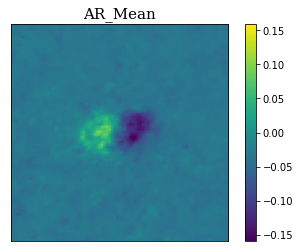

In [ ]:
plotMean(new_AR_dataset.squeeze(),'AR_Mean')

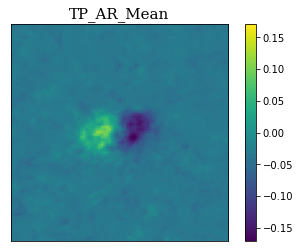

In [ ]:
plotMean(TP_AR,'TP_AR_Mean')

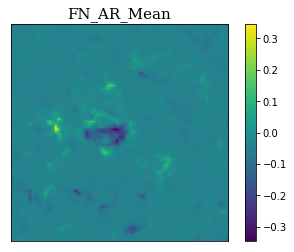

In [ ]:
plotMean(FN_AR,'FN_AR_Mean')

In [ ]:
TP_index=[]
FN_index=[]
for i in range(len(y_AR_test)):
    if y_AR_test[i]==1 and y_AR_labels[i]==1:
      TP_index.append(i)
    elif y_AR_test[i]==1 and y_AR_labels[i]==0:
      FN_index.append(i)
len(FN_index),len(TP_index)

(5, 60)

In [ ]:
print("TP:",TP_index)
print("FN:",FN_index)

TP: [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64]
FN: [7, 12, 33, 39, 57]


# AR2 DATA

In [ ]:
act2_data = np.load('drive/MyDrive/Bfield Research/Datasets/darshan_rao_bfield_AR2.npz')
lst = act2_data.files
for item in lst:
    print(item)
    print(act2_data[item].shape)
    act2_dataset=act2_data[item]


arr
(512, 512, 57)


In [ ]:
new_AR2_list=[]
x=int(512/2)
for i in range(57):
  new_AR2_list.append(act2_dataset[x-42:x+43, x-42:x+43,i])
new_AR2_dataset = np.array(new_AR2_list)


In [ ]:
for i in range(len(new_AR2_dataset)):
     new_AR2_dataset[i]=normalized(new_AR2_dataset[i])

In [ ]:
# fig, axes = plt.subplots(5,11, figsize = (64,32))
# count=0
# for i in range(5):
#     for j in  range(11):
#         axes[i,j].imshow(new_AR2_dataset[count],vmin=-1,vmax=1)
#         count+=1

In [ ]:
new_AR2_dataset2 = reshape2(new_AR2_dataset)
y_AR2_pred= clf.predict(new_AR2_dataset2)
y_AR2_labels= [int(np.around(element)) for element in y_AR2_pred]
y_AR2_test=[1]*len(y_AR2_labels)

In [ ]:
len(y_AR2_test) , len(y_AR2_labels)

(57, 57)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
acc2= accuracy_score(y_AR2_test, y_AR2_labels)
cm2=confusion_matrix(y_AR2_test, y_AR2_labels)
print(cm2)
print(acc2)

[[ 0  0]
 [29 28]]
0.49122807017543857


In [ ]:
TN_AR2,FP_AR2,FN_AR2,TP_AR2= createPNList(y_AR2_test, y_AR2_labels,new_AR2_dataset)
FN_AR2.shape,TP_AR2.shape

((29, 85, 85), (28, 85, 85))

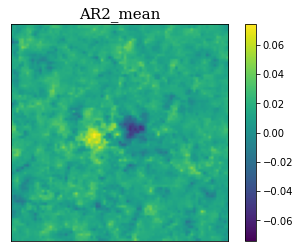

In [ ]:
plotMean(new_AR2_dataset.squeeze(),'AR2_mean')

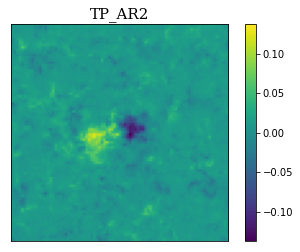

In [ ]:
plotMean(TP_AR2,'TP_AR2')

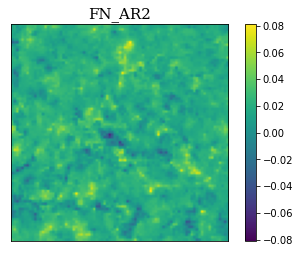

In [ ]:
plotMean(FN_AR2,'FN_AR2')

In [ ]:
TP_AR2_index=[]
FN_AR2_index=[]
for i in range(len(y_AR2_test)):
    if y_AR2_test[i]==1 and y_AR2_labels[i]==1:
      TP_AR2_index.append(i)
    elif y_AR2_test[i]==1 and y_AR2_labels[i]==0:
      FN_AR2_index.append(i)
len(FN_AR2_index),len(TP_AR2_index)

(29, 28)

In [ ]:
print("TP_AR2:",TP_AR2_index)
print("FN_AR2:",FN_AR2_index)

TP_AR2: [0, 2, 3, 4, 5, 6, 10, 11, 13, 15, 17, 18, 19, 20, 21, 24, 27, 28, 29, 31, 36, 37, 38, 40, 41, 48, 49, 51]
FN_AR2: [1, 7, 8, 9, 12, 14, 16, 22, 23, 25, 26, 30, 32, 33, 34, 35, 39, 42, 43, 44, 45, 46, 47, 50, 52, 53, 54, 55, 56]


# **AR3** DATA

In [ ]:
act3_data = np.load('drive/MyDrive/Bfield Research/Datasets/darshan_rao_bfield_AR3.npz')
lst = act3_data.files
for item in lst:
    print(item)
    print(act3_data[item].shape)
    act3_dataset=act3_data[item]

arr
(512, 512, 51)


In [ ]:
new_AR3_list=[]
x=int(512/2)
for i in range(51):
  new_AR3_list.append(act3_dataset[x-42:x+43, x-42:x+43,i])
new_AR3_dataset = np.array(new_AR3_list)

In [ ]:
for i in range(len(new_AR3_dataset)):
     new_AR3_dataset[i]=normalized(new_AR3_dataset[i])

In [ ]:
new_AR3_dataset2 = reshape2(new_AR3_dataset)
y_AR3_pred= clf.predict(new_AR3_dataset2)
y_AR3_labels= [int(np.around(element)) for element in y_AR3_pred]
y_AR3_test=[1]*len(y_AR3_labels)

In [ ]:
len(y_AR3_test) , len(y_AR3_labels)

(51, 51)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
acc3= accuracy_score(y_AR3_test, y_AR3_labels)
cm3=confusion_matrix(y_AR3_test, y_AR3_labels)
print(cm3)
print(acc3)

[[ 0  0]
 [41 10]]
0.19607843137254902


In [ ]:
TN_AR3,FP_AR3,FN_AR3,TP_AR3= createPNList(y_AR3_test, y_AR3_labels,new_AR3_dataset)
FN_AR3.shape,TP_AR3.shape

((41, 85, 85), (10, 85, 85))

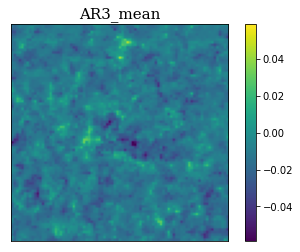

In [ ]:
plotMean(new_AR3_dataset.squeeze(),'AR3_mean')

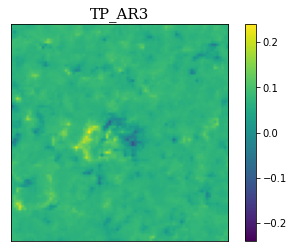

In [ ]:
plotMean(TP_AR3,'TP_AR3')

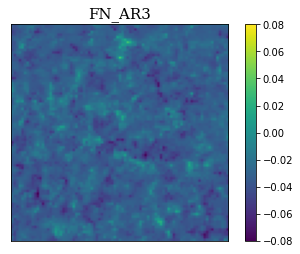

In [ ]:
plotMean(FN_AR3,'FN_AR3')

In [ ]:
TP_AR3_index=[]
FN_AR3_index=[]
for i in range(len(y_AR3_test)):
    if y_AR3_test[i]==1 and y_AR3_labels[i]==1:
      TP_AR3_index.append(i)
    elif y_AR3_test[i]==1 and y_AR3_labels[i]==0:
      FN_AR3_index.append(i)
len(FN_AR3_index),len(TP_AR3_index)

(41, 10)

In [ ]:
print("TP_AR3:",TP_AR3_index)
print("FN_AR3:",FN_AR3_index)

TP_AR3: [1, 2, 13, 14, 16, 26, 29, 33, 41, 42]
FN_AR3: [0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 43, 44, 45, 46, 47, 48, 49, 50]


# AR4 DATA

In [ ]:
act4_data = np.load('drive/MyDrive/Bfield Research/Datasets/darshan_rao_bfield_AR4.npz')
lst = act4_data.files
for item in lst:
    print(item)
    print(act4_data[item].shape)
    act4_dataset=act4_data[item]

arr
(512, 512, 47)


In [ ]:
new_AR4_list=[]
x=int(512/2)
for i in range(47):
  new_AR4_list.append(act4_dataset[x-42:x+43, x-42:x+43,i])
new_AR4_dataset = np.array(new_AR4_list)

In [ ]:
for i in range(len(new_AR4_dataset)):
     new_AR4_dataset[i]=normalized(new_AR4_dataset[i])

In [ ]:
new_AR4_dataset2 = reshape2(new_AR4_dataset)
y_AR4_pred= clf.predict(new_AR4_dataset2)
y_AR4_labels= [int(np.around(element)) for element in y_AR4_pred]
y_AR4_test=[1]*len(y_AR4_labels)

In [ ]:
len(y_AR4_test) , len(y_AR4_labels)

(47, 47)

In [ ]:
acc4= accuracy_score(y_AR4_test, y_AR4_labels)
cm4=confusion_matrix(y_AR4_test, y_AR4_labels)
print(cm4)
print(acc4)

[[ 0  0]
 [39  8]]
0.1702127659574468


In [ ]:
TN_AR4,FP_AR4,FN_AR4,TP_AR4= createPNList(y_AR4_test, y_AR4_labels,new_AR4_dataset)
FN_AR4.shape,TP_AR4.shape

((39, 85, 85), (8, 85, 85))

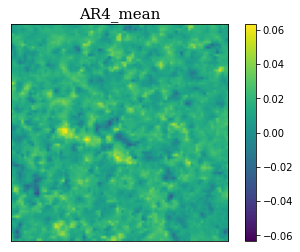

In [ ]:
plotMean(new_AR4_dataset.squeeze(),'AR4_mean')

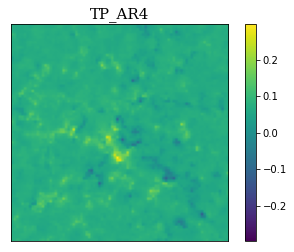

In [ ]:
plotMean(TP_AR4,'TP_AR4')

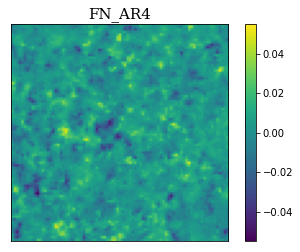

In [ ]:
plotMean(FN_AR4,'FN_AR4')

In [ ]:
TP_AR4_index=[]
FN_AR4_index=[]
for i in range(len(y_AR4_test)):
    if y_AR4_test[i]==1 and y_AR4_labels[i]==1:
      TP_AR4_index.append(i)
    elif y_AR4_test[i]==1 and y_AR4_labels[i]==0:
      FN_AR4_index.append(i)
len(FN_AR4_index),len(TP_AR4_index)

(39, 8)

In [ ]:
print("TP_AR4:",TP_AR4_index)
print("FN_AR4:",FN_AR4_index)

TP_AR4: [2, 8, 11, 12, 20, 23, 36, 39]
FN_AR4: [0, 1, 3, 4, 5, 6, 7, 9, 10, 13, 14, 15, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 38, 40, 41, 42, 43, 44, 45, 46]


# AR5 DATA

In [ ]:
act5_data = np.load('drive/MyDrive/Bfield Research/Datasets/darshan_rao_bfield_AR5.npz')
lst = act5_data.files
for item in lst:
    print(item)
    print(act5_data[item].shape)
    act5_dataset=act5_data[item]

arr
(108, 85, 85)


In [ ]:
new_AR5_list=[]
x=int(512/2)
for i in range(108):
  new_AR5_list.append(act5_dataset[i,:,:])
new_AR5_dataset = np.array(new_AR5_list)

In [ ]:
unnorm_new_AR5_dataset=new_AR5_dataset.copy()
for i in range(len(new_AR5_dataset)):
     new_AR5_dataset[i]=normalized(new_AR5_dataset[i])

In [ ]:
new_AR5_dataset2 = reshape2(new_AR5_dataset)
y_AR5_pred= clf.predict(new_AR5_dataset2)
y_AR5_labels= [int(np.around(element)) for element in y_AR5_pred]
y_AR5_test=[1]*len(y_AR5_labels)

In [ ]:
len(y_AR5_test) , len(y_AR5_labels)

(108, 108)

In [ ]:
acc5= accuracy_score(y_AR5_test, y_AR5_labels)
cm5=confusion_matrix(y_AR5_test, y_AR5_labels)
print('Confusion Matrix:')
print(cm5)
print('Accuracy:')
print(acc5)

Confusion Matrix:
[[ 0  0]
 [52 56]]
Accuracy:
0.5185185185185185


In [ ]:
TN_AR5,FP_AR5,FN_AR5,TP_AR5= createPNList(y_AR5_test, y_AR5_labels,new_AR5_dataset)
FN_AR5.shape,TP_AR5.shape

((52, 85, 85), (56, 85, 85))

In [ ]:
TP_AR5_index=[]
FN_AR5_index=[]
for i in range(len(y_AR5_test)):
    if y_AR5_test[i]==1 and y_AR5_labels[i]==1:
      TP_AR5_index.append(i)
    elif y_AR5_test[i]==1 and y_AR5_labels[i]==0:
      FN_AR5_index.append(i)
len(FN_AR5_index),len(TP_AR5_index)

(52, 56)

In [ ]:
print("TP_AR5:",TP_AR5_index)
print("FN_AR5:",FN_AR5_index)

TP_AR5: [0, 1, 2, 3, 4, 5, 9, 10, 12, 15, 19, 21, 23, 27, 28, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 51, 55, 56, 57, 59, 61, 63, 66, 68, 71, 74, 77, 79, 80, 83, 84, 85, 86, 88, 89, 92, 96, 99, 100, 102, 104, 106]
FN_AR5: [6, 7, 8, 11, 13, 14, 16, 17, 18, 20, 22, 24, 25, 26, 29, 30, 31, 32, 37, 45, 49, 50, 52, 53, 54, 58, 60, 62, 64, 65, 67, 69, 70, 72, 73, 75, 76, 78, 81, 82, 87, 90, 91, 93, 94, 95, 97, 98, 101, 103, 105, 107]


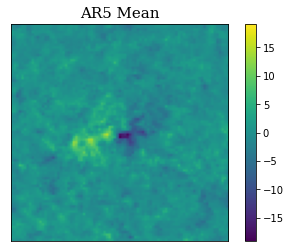

In [ ]:
plotMean(unnorm_new_AR5_dataset.squeeze(),'AR5 Mean')

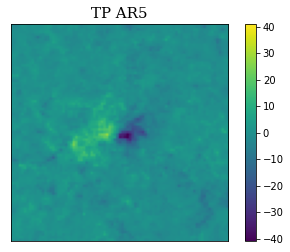

In [ ]:
plotMean(unnorm_new_AR5_dataset[TP_AR5_index],'TP AR5')

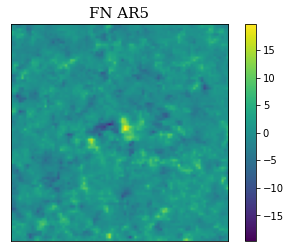

In [ ]:
plotMean(unnorm_new_AR5_dataset[FN_AR5_index],'FN AR5')

In [ ]:
# fig, axes = plt.subplots(11,10, figsize = (64,128))
# count=0
# for i in range(11):
#     for j in  range(10):
#         axes[i,j].imshow(new_AR5_dataset[count].squeeze(),vmin=-1,vmax=1)
#         count+=1

In [ ]:
hp=[0,1,2,4,5,10,12,13,16,18,19,20,27,28,29,42,46,51,53,56,60,62,63,69,70,71,83,86]
handpicked=unnorm_new_AR5_dataset[hp].squeeze()
nhp=[]
tppminushp_index=[]
totalminushp=[]

for z in range(108):
  if z not in hp:
    nhp.append(z)
nonhandpicked=unnorm_new_AR5_dataset[nhp].squeeze()

for x in TP_AR5_index:
  if x not in hp:
    tppminushp_index.append(x)
print(tppminushp_index)
tppminushp=unnorm_new_AR5_dataset[tppminushp_index].squeeze()


[3, 9, 15, 21, 23, 33, 34, 35, 36, 38, 39, 40, 41, 43, 44, 47, 48, 55, 57, 59, 61, 66, 68, 74, 77, 79, 80, 84, 85, 88, 89, 92, 96, 99, 100, 102, 104, 106]


In [ ]:
def common(lst1, lst2): 
    return list(set(lst1) & set(lst2))


In [ ]:

print(common(TP_AR5_index,hp))
print(hp)
len(common(TP_AR5_index,hp)),len(hp)-len(common(TP_AR5_index,hp))

[0, 1, 2, 4, 5, 71, 10, 42, 12, 46, 19, 51, 83, 86, 56, 27, 28, 63]
[0, 1, 2, 4, 5, 10, 12, 13, 16, 18, 19, 20, 27, 28, 29, 42, 46, 51, 53, 56, 60, 62, 63, 69, 70, 71, 83, 86]


(18, 10)

In [ ]:
len(handpicked),len(nonhandpicked),len(tppminushp)

(28, 80, 38)

In [ ]:
# fig, axes = plt.subplots(6,5, figsize = (64,128))
# count=0
# for i in range(6):
#     for j in  range(5):
#         axes[i,j].imshow(handpicked[count],cmap='binary')
#         count+=1

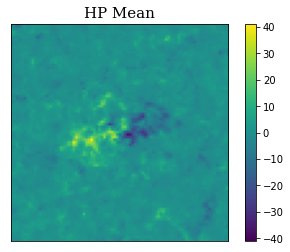

In [ ]:
plotMean(handpicked,'HP Mean')

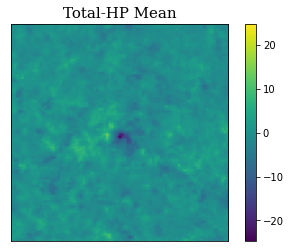

In [ ]:
plotMean(nonhandpicked,'Total-HP Mean')

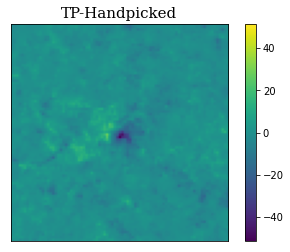

In [ ]:
plotMean(tppminushp,'TP-Handpicked')

In [ ]:
# fnplot=unnorm_new_AR5_dataset[FN_AR5_index].squeeze()
# fig, axes = plt.subplots(9,5, figsize = (32,64))
# count=0
# for i in range(9):
#     for j in  range(5):
#         axes[i,j].imshow(fnplot[count],cmap='binary')
#         count+=1

In [ ]:
# tpplot=unnorm_new_AR5_dataset[TP_AR5_index].squeeze()
# fig, axes = plt.subplots(7,10, figsize = (64,64))
# count=0
# for i in range(7):
#     for j in  range(10):
#         axes[i,j].imshow(tpplot[count],cmap='binary')
#         count+=1

# AR6 DATA

In [ ]:
act6_data = np.load('drive/MyDrive/Bfield Research/Datasets/darshan_rao_bfield_AR6.npz')
lst = act6_data.files
for item in lst:
    print(item)
    print(act6_data[item].shape)
    act6_dataset=act6_data[item]

arr
(512, 512, 53)


In [ ]:
new_AR6_list=[]
x=int(512/2)
for i in range(53):
  new_AR6_list.append(act6_dataset[x-42:x+43, x-42:x+43,i])
new_AR6_dataset = np.array(new_AR6_list)

In [ ]:
for i in range(len(new_AR6_dataset)):
     new_AR6_dataset[i]=normalized(new_AR6_dataset[i])

In [ ]:
new_AR6_dataset2 = reshape2(new_AR6_dataset)
y_AR6_pred= clf.predict(new_AR6_dataset2)
y_AR6_labels= [int(np.around(element)) for element in y_AR6_pred]
y_AR6_test=[1]*len(y_AR6_labels)

In [ ]:
len(y_AR6_test) , len(y_AR6_labels)

(53, 53)

In [ ]:
acc6= accuracy_score(y_AR6_test, y_AR6_labels)
cm6=confusion_matrix(y_AR6_test, y_AR6_labels)
print(cm6)
print(acc6)

[[ 0  0]
 [38 15]]
0.2830188679245283


In [ ]:
TN_AR6,FP_AR6,FN_AR6,TP_AR6= createPNList(y_AR6_test, y_AR6_labels,new_AR6_dataset)
FN_AR6.shape,TP_AR6.shape

((38, 85, 85), (15, 85, 85))

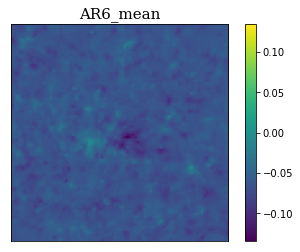

In [ ]:
plotMean(new_AR6_dataset.squeeze(),'AR6_mean')

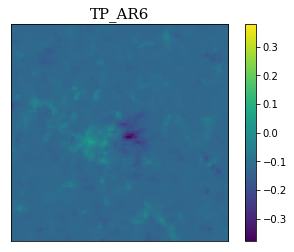

In [ ]:
plotMean(TP_AR6,'TP_AR6')

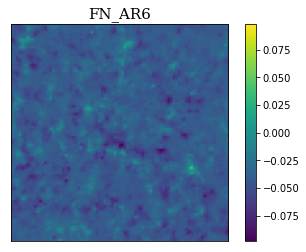

In [ ]:
plotMean(FN_AR6,'FN_AR6')

In [ ]:
TP_AR6_index=[]
FN_AR6_index=[]
for i in range(len(y_AR6_test)):
    if y_AR6_test[i]==1 and y_AR6_labels[i]==1:
      TP_AR6_index.append(i)
    elif y_AR6_test[i]==1 and y_AR6_labels[i]==0:
      FN_AR6_index.append(i)
len(FN_AR6_index),len(TP_AR6_index)

(38, 15)

In [ ]:
print("TP_AR6:",TP_AR6_index)
print("FN_AR6:",FN_AR6_index)

TP_AR6: [0, 2, 3, 5, 9, 15, 16, 17, 18, 25, 29, 33, 35, 37, 45]
FN_AR6: [1, 4, 6, 7, 8, 10, 11, 12, 13, 14, 19, 20, 21, 22, 23, 24, 26, 27, 28, 30, 31, 32, 34, 36, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52]
